In [168]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 


In [169]:
#only pick the 9th column
df = pd.read_csv('test.csv', usecols=[9])

In [170]:
# drop NaN values
df = df.dropna()


In [171]:
df

,4647
0,4666.0
1,4675.0
2,4675.0
3,4703.0
4,4759.0
...,...
7320,40059.0
7321,40648.0
7322,41080.0
7323,41678.0


<AxesSubplot: >

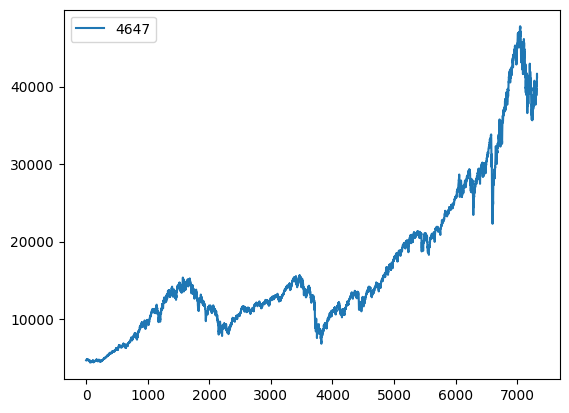

In [172]:
df.plot()

In [173]:
df.head()

,4647
0,4666.0
1,4675.0
2,4675.0
3,4703.0
4,4759.0


In [174]:
#type of data
y = df.values.astype(float)

In [175]:
y

array([[ 4666.],
       [ 4675.],
       [ 4675.],
       ...,
       [41080.],
       [41678.],
       [41235.]])

In [195]:
test_size = int(len(df)*0.07) # 7% of the data

In [196]:
train_set = y[:-(test_size)] # all data except the test_size
test_set = y[-(test_size):] # the last 7% of the data

In [197]:
train_set

array([[ 4666.],
       [ 4675.],
       [ 4675.],
       ...,
       [38389.],
       [38424.],
       [38288.]])

In [198]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1)) # scale the data between -1 and 1
scaler.fit(train_set.reshape(-1, 1)) # reshape the data to be 2D
train_norm = scaler.transform(train_set.reshape(-1, 1))  # transform the data
train_norm


array([[-0.98383921],
       [-0.98331032],
       [-0.98331032],
       ...,
       [ 0.99794317],
       [ 1.        ],
       [ 0.99200776]])

In [203]:

# convert the data to a tensor
train_data = torch.FloatTensor(train_norm).view(-1)
train_data


tensor([-9.8384e-01, -9.8331e-01, -9.8331e-01, -9.8166e-01, -9.7837e-01,
        -9.7890e-01, -9.7984e-01, -9.8055e-01, -9.7943e-01, -9.7943e-01,
        -9.7908e-01, -9.7984e-01, -9.7908e-01, -9.7961e-01, -9.8072e-01,
        -9.8072e-01, -9.8002e-01, -9.7743e-01, -9.7667e-01, -9.7467e-01,
        -9.7614e-01, -9.7432e-01, -9.7561e-01, -9.8202e-01, -9.8072e-01,
        -9.8055e-01, -9.7943e-01, -9.8184e-01, -9.8090e-01, -9.8055e-01,
        -9.7908e-01, -9.7926e-01, -9.8090e-01, -9.8255e-01, -9.7984e-01,
        -9.8055e-01, -9.8425e-01, -9.8296e-01, -9.8296e-01, -9.8402e-01,
        -9.8366e-01, -9.8443e-01, -9.8366e-01, -9.8219e-01, -9.8331e-01,
        -9.8202e-01, -9.8425e-01, -9.8278e-01, -9.8237e-01, -9.8255e-01,
        -9.8037e-01, -9.8037e-01, -9.8202e-01, -9.8278e-01, -9.8202e-01,
        -9.8219e-01, -9.8548e-01, -9.8807e-01, -9.8772e-01, -9.9307e-01,
        -9.9671e-01, -9.9600e-01, -1.0000e+00, -9.9471e-01, -9.9471e-01,
        -9.9342e-01, -9.9542e-01, -9.9430e-01, -9.9

In [209]:
# define the block size
block_size = 100




AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [208]:
train_blocks

(tensor([-0.9838, -0.9833, -0.9833, -0.9817, -0.9784, -0.9789, -0.9798, -0.9805,
         -0.9794, -0.9794, -0.9791, -0.9798, -0.9791, -0.9796, -0.9807, -0.9807,
         -0.9800, -0.9774, -0.9767, -0.9747, -0.9761, -0.9743, -0.9756, -0.9820,
         -0.9807, -0.9805, -0.9794, -0.9818, -0.9809, -0.9805, -0.9791, -0.9793,
         -0.9809, -0.9825, -0.9798, -0.9805, -0.9843, -0.9830, -0.9830, -0.9840,
         -0.9837, -0.9844, -0.9837, -0.9822, -0.9833, -0.9820, -0.9843, -0.9828,
         -0.9824, -0.9825, -0.9804, -0.9804, -0.9820, -0.9828, -0.9820, -0.9822,
         -0.9855, -0.9881, -0.9877, -0.9931, -0.9967, -0.9960, -1.0000, -0.9947,
         -0.9947, -0.9934, -0.9954, -0.9943, -0.9947, -0.9961, -0.9960, -0.9960,
         -0.9977, -0.9974, -0.9976, -0.9941, -0.9944, -0.9917, -0.9919, -0.9939,
         -0.9931, -0.9914, -0.9917, -0.9921, -0.9925, -0.9951, -0.9974, -0.9954,
         -0.9977, -0.9964, -0.9964, -0.9964, -0.9925, -0.9905, -0.9893, -0.9903,
         -0.9908, -0.9897, -